In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

%matplotlib inline
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans

In [68]:
df_train = pd.read_csv("df_train.csv")

In [51]:
df_train.head()

,CustomerID,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Gender,has_Kids,Age,daysAsCardClient,Graduation,HighSchool,Master,PhD,Married,Single,Widow,Mnt_pday_card
0,14594,113947.0,0,0,43.0,4640.0,3380,5700.0,2240.0,562.0,154.0,2,10,7,7,4,0,0,1,0,0,0,0,0,42,815,1,0,0,0,0,1,0,20.461350
1,19070,114297.0,0,0,74.0,7080.0,3680,7620.0,1840.0,1220.0,46.0,1,5,9,12,2,0,0,0,0,0,0,0,0,49,724,1,0,0,0,1,0,0,29.676796
2,29888,115476.0,0,0,85.0,4130.0,380,4890.0,3640.0,380.0,28.0,1,5,5,7,1,0,0,0,0,0,0,1,0,63,447,0,0,0,1,1,0,0,30.085011
3,12221,101172.0,1,1,25.0,3590.0,0,1770.0,80.0,180.0,14.0,5,8,3,8,5,0,0,0,0,0,0,1,1,43,539,1,0,0,0,1,0,0,10.452690
4,21107,123128.0,0,0,64.0,5390.0,1126,9495.0,656.0,562.0,74.0,0,4,7,8,5,0,1,0,1,0,0,1,0,52,844,0,1,0,0,0,1,0,20.501185


In [94]:
df_train.set_index(keys = "CustomerID", inplace = True)

In [79]:
# Removing the Outliers for the low income groups

df_train.drop(index = df_train[(df_train["Income"] < 50000) & (df_train["MntVegan&Vegetarian"] > 20000)].index, inplace = True)

In [91]:
# Creating a subset the customers with Income above the 200000 monetary due to the huge difference between the and the normal customers standard
df_outliers = df_train[df_train["Income"] > 200000].copy()
df_outliers.set_index(keys = "CustomerID", inplace = True)

In [96]:
df_train

,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Gender,has_Kids,Age,daysAsCardClient,Graduation,HighSchool,Master,PhD,Married,Single,Widow,Mnt_pday_card
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14594,113947.0,0,0,43.0,4640.0,3380,5700.0,2240.0,562.0,154.0,2,10,7,7,4,0,0,1,0,0,0,0,0,42,815,1,0,0,0,0,1,0,20.461350
19070,114297.0,0,0,74.0,7080.0,3680,7620.0,1840.0,1220.0,46.0,1,5,9,12,2,0,0,0,0,0,0,0,0,49,724,1,0,0,0,1,0,0,29.676796
29888,115476.0,0,0,85.0,4130.0,380,4890.0,3640.0,380.0,28.0,1,5,5,7,1,0,0,0,0,0,0,1,0,63,447,0,0,0,1,1,0,0,30.085011
12221,101172.0,1,1,25.0,3590.0,0,1770.0,80.0,180.0,14.0,5,8,3,8,5,0,0,0,0,0,0,1,1,43,539,1,0,0,0,1,0,0,10.452690
21107,123128.0,0,0,64.0,5390.0,1126,9495.0,656.0,562.0,74.0,0,4,7,8,5,0,1,0,1,0,0,1,0,52,844,0,1,0,0,0,1,0,20.501185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30686,98968.0,0,0,66.0,9090.0,260,6015.0,260.0,0.0,40.0,1,6,6,11,2,0,0,0,0,0,0,1,0,29,482,0,0,0,1,0,0,0,32.500000
17210,109977.0,0,0,8.0,5870.0,1020,13470.0,3800.0,0.0,86.0,1,5,7,7,2,0,0,0,0,0,0,1,0,38,934,1,0,0,0,0,0,0,25.959315
29186,56039.0,0,1,30.0,540.0,0,135.0,0.0,0.0,5.0,2,3,1,4,6,0,0,0,0,0,0,1,1,56,475,0,0,0,1,1,0,0,1.431579


In [99]:
# Removing the subset of the outliers of the dataset to be used in the models
df_train.drop(index = df_outliers.index, inplace = True)

In [100]:

scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns = df_train.columns)
df_train.describe()

,Income,Kid_Younger6,Children_6to18,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,Gender,has_Kids,Age,daysAsCardClient,Graduation,HighSchool,Master,PhD,Married,Single,Widow,Mnt_pday_card
count,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6898.00000,6898.000000,6898.000000,6898.000000,6898.000000
mean,0.487700,0.220209,0.244926,0.497085,0.208337,0.136183,0.173383,0.139174,0.137687,0.173196,0.148847,0.469043,0.154664,0.451547,0.267425,0.010148,0.079443,0.073355,0.082633,0.065961,0.014062,0.732821,0.703247,0.500404,0.496044,0.502320,0.095390,0.162801,0.21412,0.653668,0.220354,0.034503,0.135431
std,0.205304,0.271529,0.271114,0.291543,0.225476,0.198825,0.221234,0.203255,0.202461,0.199958,0.129013,0.206204,0.119818,0.250261,0.135318,0.100231,0.270449,0.260737,0.275346,0.248232,0.117755,0.442519,0.456860,0.210372,0.290333,0.500031,0.293774,0.369211,0.41024,0.475835,0.414515,0.182530,0.149314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.322888,0.000000,0.000000,0.242424,0.017356,0.010050,0.016016,0.010050,0.010050,0.036145,0.062500,0.307692,0.041667,0.230769,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350877,0.244635,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.015870
50%,0.490081,0.000000,0.000000,0.494949,0.125501,0.045226,0.074074,0.045226,0.045226,0.096386,0.125000,0.461538,0.125000,0.384615,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.491228,0.487840,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.079823
75%,0.652582,0.500000,0.500000,0.747475,0.341622,0.175879,0.243243,0.180779,0.175879,0.232932,0.187500,0.615385,0.208333,0.615385,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.666667,0.748212,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.213227
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


### Customer Value Prespective

In [25]:
df_train.columns

Index(['Income', 'Kid_Younger6', 'Children_6to18', 'Recency', 'MntMeat&Fish',
       'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth',
       'Complain', 'Response_Cmp1', 'Response_Cmp2', 'Response_Cmp3',
       'Response_Cmp4', 'Response_Cmp5', 'Gender', 'has_Kids', 'Age',
       'daysAsCardClient', 'Graduation', 'HighSchool', 'Master', 'PhD',
       'Married', 'Single', 'Widow', 'Mnt_pday_card'],
      dtype='object')

In [130]:
#using only Monetary variables for the customer value prespective
df_value = df_train[['Income', 'MntMeat&Fish','MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests','Mnt_pday_card',"Recency","daysAsCardClient", 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth' ]].copy()


In [131]:
ks = range(1,11)
inertias = []


for k in ks:
    model = KMeans(n_clusters = k).fit(df_value)
    inertias.append(model.inertia_)

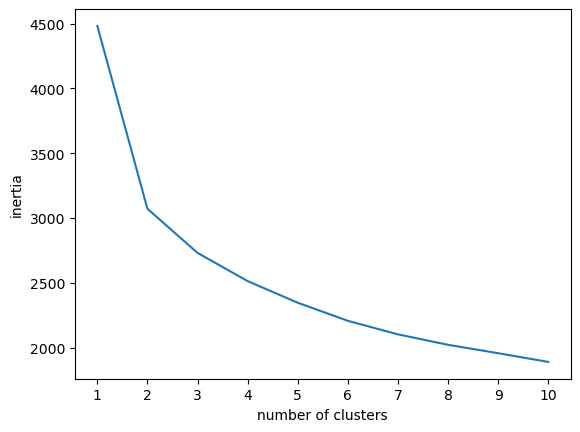

In [133]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

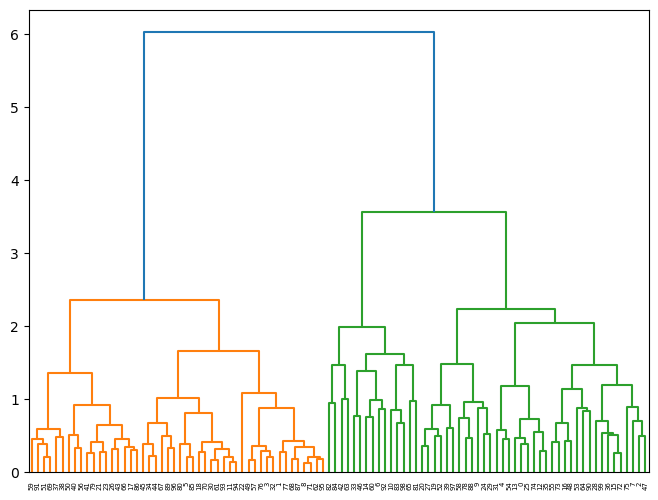

In [134]:
from scipy.cluster import hierarchy
#from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# Get a random sample, as hierarchical clustering can take a lot of time to run.
df_value_sample = df_value.sample(n = 100, random_state = 100)

# create clusters using the "ward method"
clusters = hierarchy.linkage(df_value_sample, method="ward")

# create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

### Using k = 2

In [135]:
df_value_k2 = df_value.copy()
model_k2 = sk.cluster.KMeans(n_clusters = 2, random_state = 1).fit(df_value_k2)

In [136]:
df_value_k2.head()

,Income,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,Mnt_pday_card,Recency,daysAsCardClient,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth
0,0.737079,0.309746,0.849246,0.380380,0.562814,0.141206,0.618474,0.218959,0.434343,0.766810,0.1250,0.769231,0.291667,0.538462,0.20
1,0.739394,0.472630,0.924623,0.508509,0.462312,0.306533,0.184739,0.317671,0.747475,0.636624,0.0625,0.384615,0.375000,0.923077,0.10
2,0.747191,0.275701,0.095477,0.326326,0.914573,0.095477,0.112450,0.322044,0.858586,0.240343,0.0625,0.384615,0.208333,0.538462,0.05
3,0.652594,0.239653,0.000000,0.118118,0.020101,0.045226,0.056225,0.111750,0.252525,0.371960,0.3125,0.615385,0.125000,0.615385,0.25
4,0.797797,0.359813,0.282915,0.633634,0.164824,0.141206,0.297189,0.219386,0.646465,0.808298,0.0000,0.307692,0.291667,0.615385,0.25


In [137]:
df_value_k2["label"] = model_k2.labels_

In [138]:
df_value_k2["label"].value_counts()

0    3860
1    3038
Name: label, dtype: int64

In [139]:
df_value_k2.groupby(["label"]).mean().transpose()

label,0,1
Income,0.344453,0.669705
MntMeat&Fish,0.058860,0.398259
MntEntries,0.032747,0.267607
MntVegan&Vegetarian,0.034759,0.349514
MntDrinks,0.032911,0.274190
MntDesserts,0.032650,0.271145
MntAdditionalRequests,0.086797,0.282973
Mnt_pday_card,0.034201,0.264050
Recency,0.490354,0.505637
daysAsCardClient,0.466603,0.533451


### Using K=3

In [140]:
df_value_k3 = df_value.copy()
model_k3 = sk.cluster.KMeans(n_clusters = 3, random_state = 2).fit(df_value_k3)

In [141]:
df_value_k3["label"] = model_k3.labels_

In [142]:
df_value_k3.groupby(["label"]).describe()

Income                                                              \
        count      mean       std       min       25%       50%       75%   
label                                                                       
0      1722.0  0.728095  0.089993  0.317608  0.667094  0.730261  0.788072   
1      3191.0  0.317352  0.125911  0.000000  0.227686  0.316067  0.407136   
2      1985.0  0.552998  0.113640  0.108381  0.483596  0.556290  0.623184   

                MntMeat&Fish                                          \
            max        count      mean       std       min       25%   
label                                                                  
0      1.000000       1722.0  0.411194  0.210568  0.034045  0.250334   
1      0.706896       3191.0  0.031463  0.040577  0.000000  0.005340   
2      0.921420       1985.0  0.316693  0.194538  0.006676  0.168224   

                                   MntEntries                           \
            50%       75%      max      count      mean       std  min   
label                                                                    
0      0.383511  0.557744  0.99733     1722.0  0.363892  0.250466  0.0   
1      0.015354  0.038718  0.47530     3191.0  0.025594  0.038779  0.0   
2      0.273698  0.427904  1.00000     1985.0  0.116424  0.124590  0.0   

                                              MntVegan&Vegetarian            \
            25%       50%       75%       max               count      mean   
label                                                                         
0      0.152387  0.306533  0.537688  1.000000              1722.0  0.478327   
1      0.005025  0.010050  0.030151  0.597990              3191.0  0.023614   
2      0.025126  0.075377  0.165829  0.859296              1985.0  0.149604   

                                                                  MntDrinks  \
            std       min       25%       50%       75%       max     count   
label                                                                         
0      0.221944  0.057057  0.305556  0.462462  0.635385  1.000000    1722.0   
1      0.025344  0.000000  0.008008  0.015015  0.029530  0.351351    3191.0   
2      0.095028  0.008008  0.082082  0.126126  0.195195  0.671672    1985.0   

                                                                        \
           mean       std  min       25%       50%       75%       max   
label                                                                    
0      0.371816  0.252837  0.0  0.160804  0.316583  0.542714  1.000000   
1      0.025545  0.038661  0.0  0.003015  0.010050  0.034925  0.412060   
2      0.120023  0.132858  0.0  0.030151  0.075377  0.165829  0.979899   

      MntDesserts                                                         \
            count      mean       std  min       25%       50%       75%   
label                                                                      
0          1722.0  0.369148  0.255261  0.0  0.150754  0.306533  0.542714   
1          3191.0  0.025844  0.039733  0.0  0.005025  0.010050  0.030905   
2          1985.0  0.116689  0.127973  0.0  0.025126  0.075377  0.160804   

                MntAdditionalRequests                                     \
            max                 count      mean       std  min       25%   
label                                                                      
0      1.000000                1722.0  0.292298  0.230328  0.0  0.120482   
1      0.407035                3191.0  0.062183  0.074038  0.0  0.016064   
2      0.909548                1985.0  0.248334  0.215360  0.0  0.088353   

                                    Mnt_pday_card                      \
            50%       75%       max         count      mean       std   
label                                                                   
0      0.216867  0.416667  1.000000        1722.0  0.337028  0.135320   
1      0.040161  0.080321  0.678715        3191.0  0.023112  0.02

The model is creating a cluster around the outliers values

### Using K = 4

In [143]:
df_value_k4 = df_value.copy()
model_k4 = sk.cluster.KMeans(n_clusters = 4, random_state = 2).fit(df_value_k4)

In [144]:
df_value_k4["label"] = model_k4.labels_

Measuring distances between clusters

In [145]:
from sklearn.metrics.pairwise import euclidean_distances

dists_k3 = euclidean_distances(model_k3.cluster_centers_)
dists_k3

array([[0.        , 1.15719101, 0.67524777],
       [1.15719101, 0.        , 0.70606878],
       [0.67524777, 0.70606878, 0.        ]])

In [146]:
dists_k4 = euclidean_distances(model_k4.cluster_centers_)
dists_k4

array([[0.        , 0.80215295, 1.16742973, 0.52530403],
       [0.80215295, 0.        , 0.64888055, 0.74429855],
       [1.16742973, 0.64888055, 0.        , 1.18622002],
       [0.52530403, 0.74429855, 1.18622002, 0.        ]])

### Visualization

In [147]:
cluster0 = df_value_k2[df_value_k2.label == 0]
cluster1 = df_value_k2[df_value_k2.label == 1]


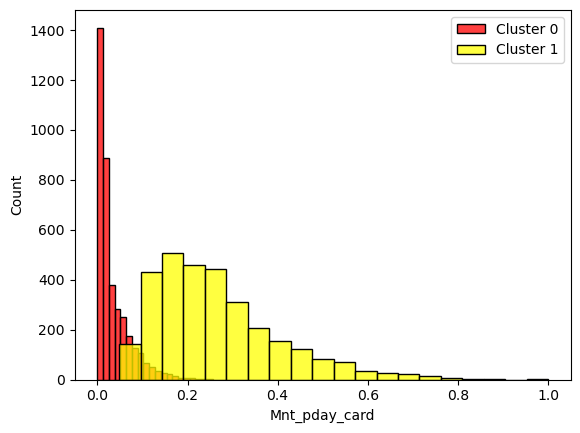

In [148]:
sns.histplot(cluster0['Mnt_pday_card'],color='red',label='Cluster 0', bins = 20)
sns.histplot(cluster1['Mnt_pday_card'],color='yellow',label='Cluster 1', bins = 20)
plt.legend()

In [149]:
cluster0 = df_value_k3[df_value_k3.label == 0]
cluster1 = df_value_k3[df_value_k3.label == 1]
cluster2 = df_value_k3[df_value_k3.label == 2]

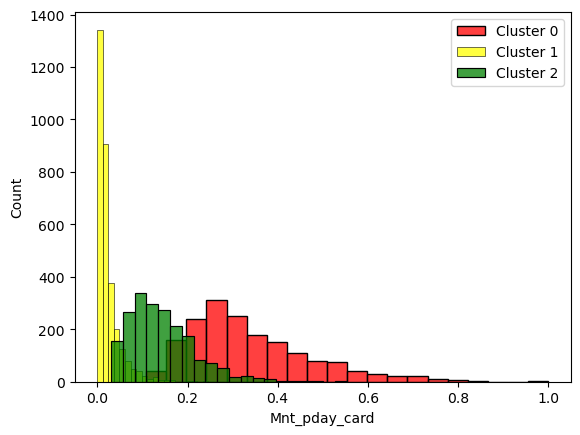

In [150]:
sns.histplot(cluster0['Mnt_pday_card'],color='red',label='Cluster 0', bins = 20)
sns.histplot(cluster1['Mnt_pday_card'],color='yellow',label='Cluster 1', bins = 20)
sns.histplot(cluster2['Mnt_pday_card'],color='green',label='Cluster 2', bins = 20)
plt.legend()

In [151]:
cluster0 = df_value_k4[df_value_k4.label == 0]
cluster1 = df_value_k4[df_value_k4.label == 1]
cluster2 = df_value_k4[df_value_k4.label == 2]
cluster3 = df_value_k4[df_value_k4.label == 3]

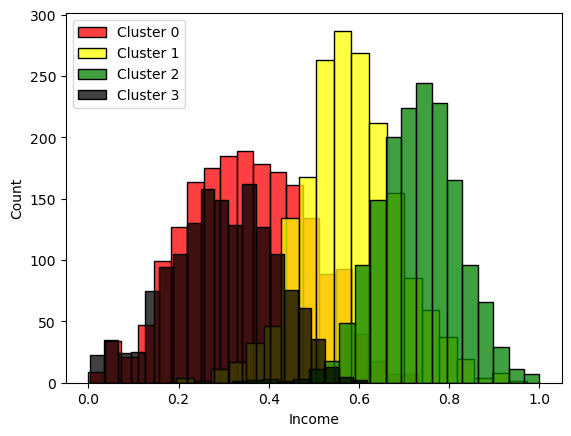

In [152]:
sns.histplot(cluster0['Income'],color='red',label='Cluster 0', bins = 20)
sns.histplot(cluster1['Income'],color='yellow',label='Cluster 1', bins = 20)
sns.histplot(cluster2['Income'],color='green',label='Cluster 2', bins = 20)
sns.histplot(cluster3['Income'],color='k',label='Cluster 3', bins = 20)
plt.legend()